In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, MaxPooling2D, Conv2D

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])


In [8]:
# Print the model summary

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [9]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[acc, mae])

In [10]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [12]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [13]:
# Print the shape of the training data

train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [14]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [15]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.
test_images = test_images/255.

The image is of Ankle boot


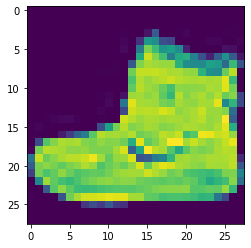

In [16]:
# Display one of the images

i=0
img = train_images[i,:,:]
plt.imshow(img)
print(f"The image is of {labels[train_labels[i]]}")

#### Fit the model

In [17]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 9s - loss: 0.5636 - sparse_categorical_accuracy: 0.8024 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 9s - loss: 0.3754 - sparse_categorical_accuracy: 0.8691 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 9s - loss: 0.3428 - sparse_categorical_accuracy: 0.8780 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 9s - loss: 0.3252 - sparse_categorical_accuracy: 0.8845 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 9s - loss: 0.3126 - sparse_categorical_accuracy: 0.8888 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 9s - loss: 0.3014 - sparse_categorical_accuracy: 0.8938 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 9s - loss: 0.2940 - sparse_categorical_accuracy: 0.8946 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 9s - loss: 0.2837 - sparse_categorical_accuracy: 0.8991 - mean_absolute_error: 4.4200


#### Plot training history

In [18]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.563617,0.802433,4.420001
1,0.375365,0.869067,4.419999
2,0.342845,0.878000,4.420000
3,0.325150,0.884483,4.420001
4,0.312609,0.888817,4.420001


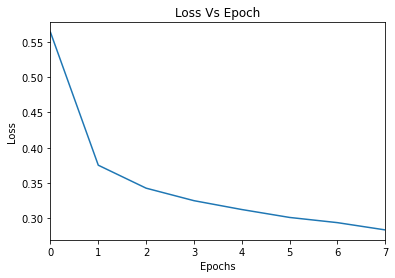

In [19]:
# Make a plot for the loss

loss_plot = df.plot(y='loss', title='Loss Vs Epoch', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')
plt.show()

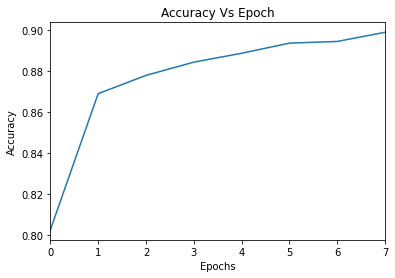

In [20]:
# Make a plot for the accuracy

acc_plot = df.plot(y='sparse_categorical_accuracy', title='Accuracy Vs Epoch', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')
plt.show()

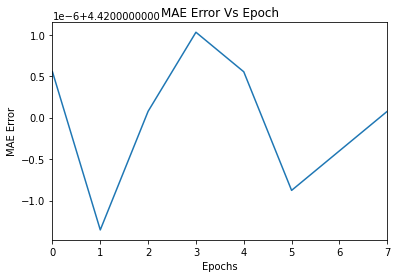

In [21]:
# Make a plot for the additional metric

mae_plot = df.plot(y='mean_absolute_error', title='MAE Error Vs Epoch', legend=False)
mae_plot.set(xlabel='Epochs', ylabel='MAE Error')
plt.show()

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [24]:
# Evaluate the model

test_loss, test_acc, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

313/313 - 1s - loss: 0.3175 - sparse_categorical_accuracy: 0.8878 - mean_absolute_error: 4.4200


#### Make predictions from the model

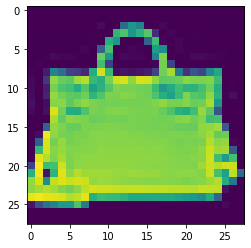

Label: Bag


In [26]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [27]:
test_image.shape

(28, 28)

In [29]:
# Get the model predictions

y_pred = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f"Model prediction: {labels[np.argmax(y_pred)]}")

Model prediction: Bag
